## Laboratory 9: Data Sampling

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Instructions

1. Load the `titanic` dataset available in seaborn module. The code for item is already provided.
2. **Basic EDA**: Plot the distribution of the dataset by `class`. Also, use the *describe()* function to get the statistical summary of the dataset.
3. Make new dataframes based on the following sampling techniques:
 - **Simple Random Sampling**: Create random samples of `177` obsevations from the dataset. Use a `random_state = 1443`
 - **Systematic Sampling**: Choose an observation every `5th` item starting from the `first` observation, until you create a sample of 177 observations.
 - **Stratified Sampling**: Divide the dataset into three strata based on `class` (Third, Second, First), then perform random sampling. The total observation should be 177, with 59 observation per stratum. Use a `random_state = 1443`
 - **Single-Stage Cluster Sampling**: Randomly select two types of `embark_town`, and use all their data.
 - **Two-Stage Cluster Sampling**: Divide the dataset into three clusters based on their `embark_town`, then perform a random sampling of 40 observations for each cluster, having a total of 120 observations.
 
4. Compare the samples generated to the original dataset by using data visualizations (histogram, bar graph, etc), and statistical summary. Provide insights per comparison
5. Write a summary of what you learned about performing different data sampling techniques.

## 1. Load the dataset

In [2]:
data = sns.load_dataset('titanic')
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


## 1.2 Data Cleaning

In [3]:
# Check for missing values in the data dataframe
missing_values = data.isnull().sum()

missing_values

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [4]:
data['age'].fillna(data['age'].median(), inplace=True)

data.dropna(subset=['embark_town'], inplace=True)

## 2. Basic EDA

### 2.1 Plot the distribution of the data per class

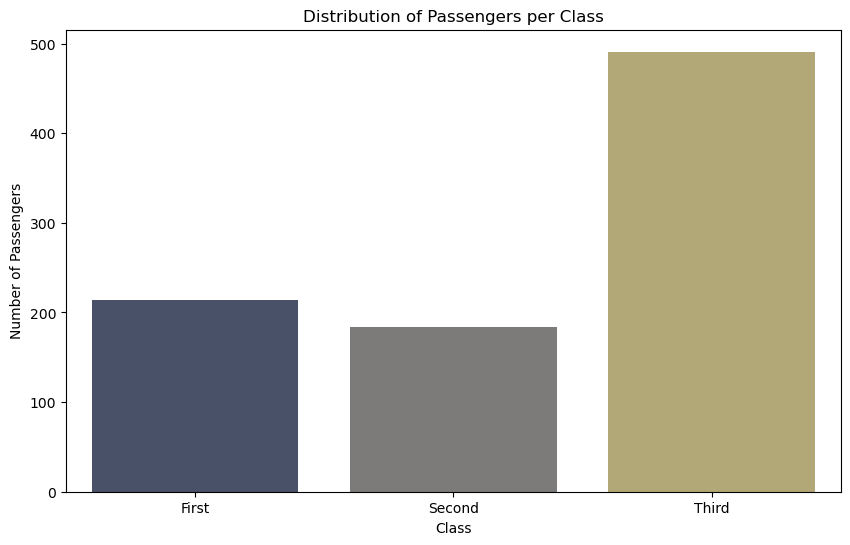

In [5]:
# INSERT CODE HERE

plt.figure(figsize=(10, 6))
sns.countplot(x='class', data=data, palette='cividis')

# labels and a title
plt.xlabel('Class')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passengers per Class')

plt.show()

### 2.2 Use describe() to get the statistical summary of the dataset.

In [6]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.315152,0.524184,0.382452,32.096681
std,0.486260,0.834700,12.984932,1.103705,0.806761,49.697504
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 3. Sampling Techniques

### 3.1 Simple Random Sampling

In [7]:
# Setting the random seed for reproducibility
random_state = 1443

# Random sample of 177 observations
rsample = data.sample(n=177, random_state=random_state)

rsample

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
111,0,3,female,14.5,1,0,14.4542,C,Third,child,False,NaN,Cherbourg,no,False
500,0,3,male,17.0,0,0,8.6625,S,Third,man,True,NaN,Southampton,no,True
802,1,1,male,11.0,1,2,120.0000,S,First,child,False,B,Southampton,yes,False
614,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
430,1,1,male,28.0,0,0,26.5500,S,First,man,True,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,1,2,female,33.0,1,2,27.7500,S,Second,woman,False,NaN,Southampton,yes,False
471,0,3,male,38.0,0,0,8.6625,S,Third,man,True,NaN,Southampton,no,True
333,0,3,male,16.0,2,0,18.0000,S,Third,man,True,NaN,Southampton,no,False
779,1,1,female,43.0,0,1,211.3375,S,First,woman,False,B,Southampton,yes,False


### 3.2 Systematic Sampling

In [8]:
# Selecting every 5th observation starting from the first until you have 177 observations
every_fifth_sample = data.iloc[::5, :].head(177)

every_fifth_sample

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
5,0,3,male,28.0,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
15,1,2,female,55.0,0,0,16.0000,S,Second,woman,False,NaN,Southampton,yes,True
20,0,2,male,35.0,0,0,26.0000,S,Second,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,1,1,female,48.0,0,0,25.9292,S,First,woman,False,D,Southampton,yes,True
867,0,1,male,31.0,0,0,50.4958,S,First,man,True,A,Southampton,no,True
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
877,0,3,male,19.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True


### 3.3 Stratified Sampling

In [9]:
# Function to perform random sampling within each stratum
def stratified_sample(stratum, size):
    return stratum.sample(n=size, random_state=random_state)

# Divide the dataset into three strata based on 'class'
strata = data.groupby('class', group_keys=False).apply(stratified_sample, size=59)

strata

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
698,0,1,male,49.0,1,1,110.8833,C,First,man,True,C,Cherbourg,no,False
487,0,1,male,58.0,0,0,29.7000,C,First,man,True,B,Cherbourg,no,True
151,1,1,female,22.0,1,0,66.6000,S,First,woman,False,C,Southampton,yes,False
662,0,1,male,47.0,0,0,25.5875,S,First,man,True,E,Southampton,no,True
366,1,1,female,60.0,1,0,75.2500,C,First,woman,False,D,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,0,3,male,36.0,0,0,0.0000,S,Third,man,True,NaN,Southampton,no,True
37,0,3,male,21.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
409,0,3,female,28.0,3,1,25.4667,S,Third,woman,False,NaN,Southampton,no,False
825,0,3,male,28.0,0,0,6.9500,Q,Third,man,True,NaN,Queenstown,no,True


### 3.4 Single-Stage Cluster Sampling

In [10]:
# Randomly select two types of 'embark_town'
selected_embark_towns = data['embark_town'].unique()
selected_embark_towns = pd.Series(selected_embark_towns).sample(n=2, random_state=random_state).tolist()

# Filter the dataset to include only the selected 'embark_town' types
selected_data = data[data['embark_town'].isin(selected_embark_towns)]

selected_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False


### 3.5 Two-Stage Cluster Sampling

In [11]:
# Function to perform random sampling within each cluster
def cluster_sample(cluster, size):
    return cluster.sample(n=size, random_state=random_state)

# Divide the dataset into three clusters based on 'embark_town' and perform random sampling
cluster_sample_size = 40
cluster_samples = data.groupby('embark_town', group_keys=False).apply(cluster_sample, size=cluster_sample_size)

cluster_samples

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
273,0,1,male,37.0,0,1,29.7000,C,First,man,True,C,Cherbourg,no,False
858,1,3,female,24.0,0,3,19.2583,C,Third,woman,False,NaN,Cherbourg,yes,False
681,1,1,male,27.0,0,0,76.7292,C,First,man,True,D,Cherbourg,yes,True
367,1,3,female,28.0,0,0,7.2292,C,Third,woman,False,NaN,Cherbourg,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0,3,male,21.0,0,0,8.4333,S,Third,man,True,NaN,Southampton,no,True
164,0,3,male,1.0,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False
664,1,3,male,20.0,1,0,7.9250,S,Third,man,True,NaN,Southampton,yes,False
77,0,3,male,28.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 4. Comparison of Full Dataset vs Sampled Dataset

### 4.1 Simple Random Sampling

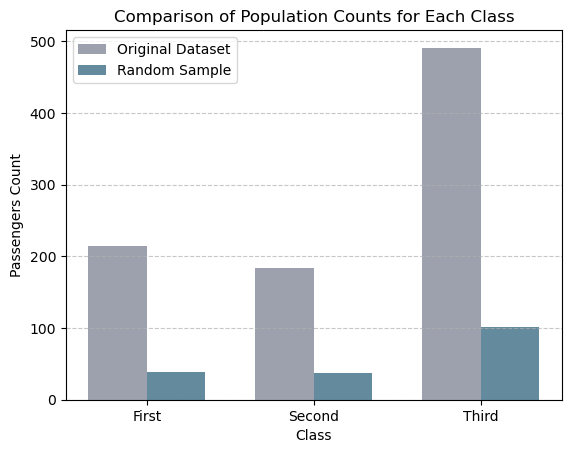

In [12]:
# List of classes
classes_random = ['First', 'Second', 'Third']

# Initialize lists to store population counts
original_counts = []
sampled_counts = []

# Loop through each class and calculate the population counts
for class_name in classes_random:
    # Filter the original dataset for the current class
    class_original = data[data['class'] == class_name]
    
    # Filter the sampled dataset for the current class
    class_sampled = rsample[rsample['class'] == class_name]
    
    # Append the population counts to the lists
    original_counts.append(len(class_original))
    sampled_counts.append(len(class_sampled))

# Set up positions for the bars
bar_width = 0.35
originalP = np.arange(len(classes_random))
sampledP = originalP + bar_width

# Bar plot to compare the population counts of all classes in the original and sampled datasets
plt.bar(originalP, original_counts, width=bar_width, alpha=0.7, label='Original Dataset', color='#72798A')
plt.bar(sampledP, sampled_counts, width=bar_width, alpha=0.7, label='Random Sample', color='#215974')
plt.xlabel('Class')
plt.ylabel('Passengers Count')
plt.title('Comparison of Population Counts for Each Class')
plt.xticks(originalP + bar_width / 2, classes_random)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [13]:
rsample.describe()

,survived,pclass,age,sibsp,parch,fare
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.355932,2.350282,28.542373,0.519774,0.378531,35.074011
std,0.480153,0.819792,12.021626,0.905102,0.877880,57.562915
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,13.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,3.000000,64.000000,5.000000,6.000000,512.329200


**Insights:**

**Class Distribution:**
   - *Original Dataset:* Dominated by many third-class passengers, followed by first-class and second-class passengers.
   - *Random Sample:* Exhibits a more balanced distribution of passengers across all three classes.

   **Reason for Change:**
   - *Original Dataset:* Reflects the historical social hierarchy with most third-class passengers, possibly due to economic disparities.
   - *Random Sample:* Introduces randomness, providing a more representative snapshot of class distribution, mitigating the bias observed in the original dataset.

### 4.2 Systematic Sampling

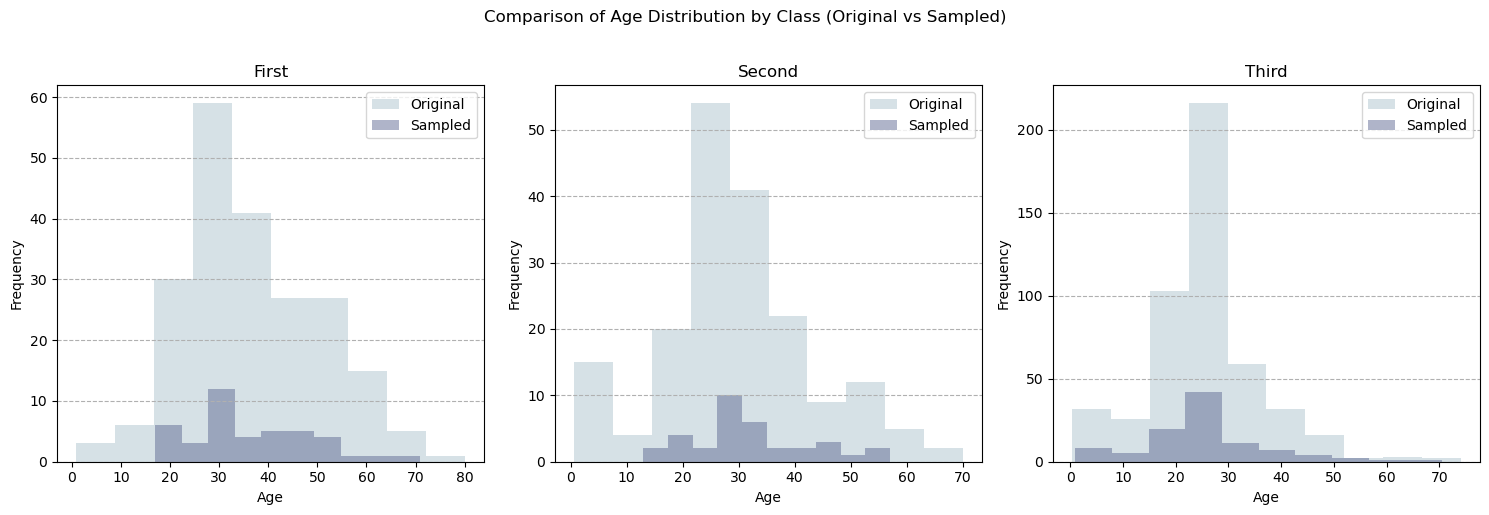

In [14]:
# List of classes
classes_systematic = ['First', 'Second', 'Third']

# Set up the subplots
fig, axes = plt.subplots(nrows=1, ncols=len(classes_systematic), figsize=(15, 5))
fig.suptitle('Comparison of Age Distribution by Class (Original vs Sampled)', y=1.02)

# Plot histograms for each class in both the original and sampled datasets
for i, class_name in enumerate(classes_systematic):
    axes[i].hist(data[data['class'] == class_name]['age'].dropna(), bins=10, alpha=0.5, label='Original', color='#AEC5CF')
    axes[i].hist(every_fifth_sample[every_fifth_sample['class'] == class_name]['age'].dropna(), bins=10, alpha=0.5, label='Sampled', color='#606B94')
    
    axes[i].set_title(f'{class_name}')
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(axis='y', linestyle='--', alpha= 1)

plt.tight_layout()
plt.show()

In [15]:
every_fifth_sample.describe()

,survived,pclass,age,sibsp,parch,fare
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.389831,2.333333,29.550847,0.559322,0.293785,26.955202
std,0.489095,0.837113,12.723355,1.161961,0.717964,36.757497
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,71.000000,8.000000,5.000000,263.000000


**Insights:**

  * Original dataset: exhibits a higher proportion of adult passengers (20-40 years old) across all classes.
  * Systematic sample: displays a more balanced age distribution across all classes, with a slightly higher proportion of adult passengers (20-30 years old).

**Reasons for the Age Distribution Discrepancy:**

 **Class-Related Skewness in Original Data:**
   * *Original Data:* The dataset may be skewed towards certain classes, leading to a higher proportion of adults (20-40) in the recorded age distribution.
   * *Systematic Sample:* The systematic sample's random selection aims to mitigate this skewness, providing a more balanced representation of age across all classes.

 **Biases in Age Demographics within Classes:**
   * *Original Data:* Variability in age distribution across different classes may result from biases related to economic status and travel purposes.
   * *Systematic Sample:* By including passengers from all classes more randomly, the sample addresses these biases, achieving a more uniform age distribution.

 **Intentional Sampling Methodology:**
   * *Original Data:* The dataset may have inherent biases due to how data was collected, potentially overemphasizing certain age groups within each class.
   * *Systematic Sample:* The systematic sampling process intentionally introduces randomness, ensuring a more representative sample and reflecting the broader age distribution within the Titanic passenger population.

### 4.3 Stratified Sampling

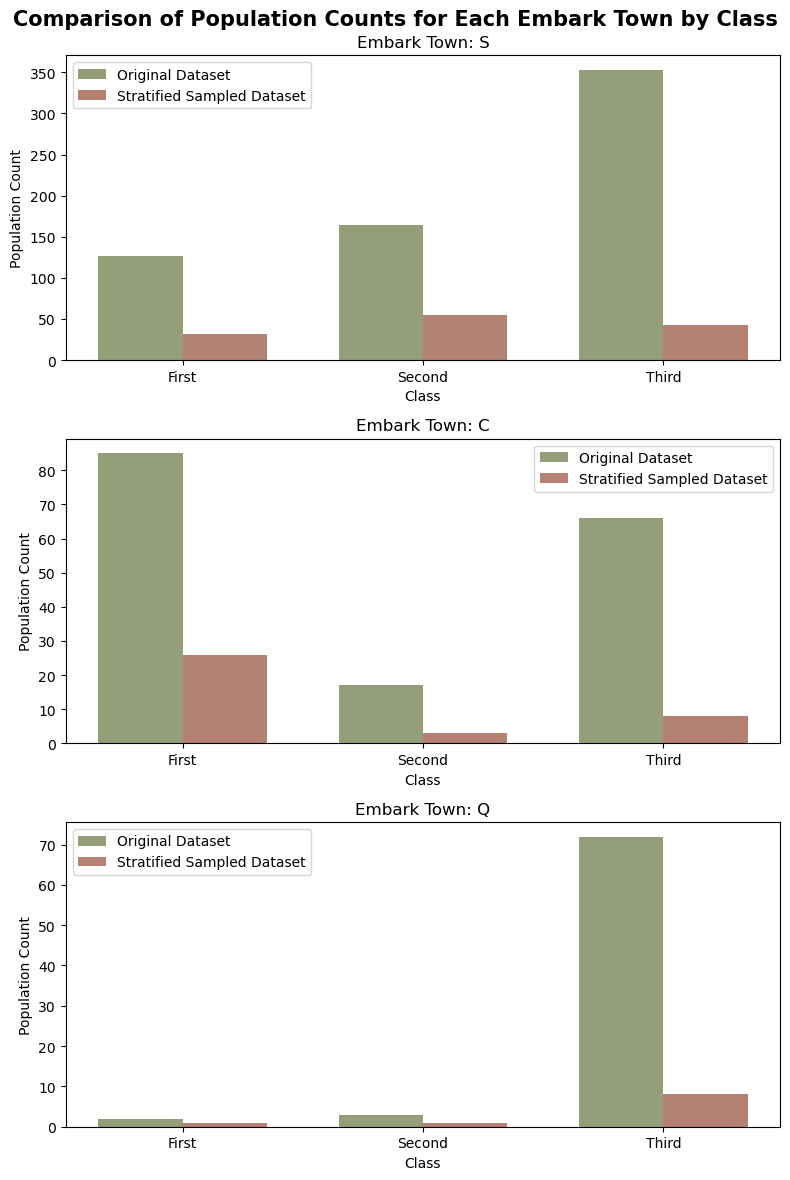

In [16]:
# List of embark towns
embark_towns = data['embarked'].unique()

# Set up the subplots with increased spacing
fig, axes = plt.subplots(nrows=len(embark_towns), ncols=1, figsize=(8, 4 * len(embark_towns)))
fig.suptitle('Comparison of Population Counts for Each Embark Town by Class', fontweight='bold', fontsize=15)

# Iterate over each embark town
for i, embark_town in enumerate(embark_towns):
    # Count the occurrences of each class in the original dataset for the current embark town
    original_counts_class = data[data['embarked'] == embark_town]['class'].value_counts().reindex(['First', 'Second', 'Third']).fillna(0)

    # Count the occurrences of each class in the stratified sampled dataset for the current embark town
    sampled_counts_class = strata[strata['embarked'] == embark_town]['class'].value_counts().reindex(['First', 'Second', 'Third']).fillna(0)

    # Set up positions for the bars
    bar_width = 0.35
    bar_positions_original = np.arange(len(original_counts_class))
    bar_positions_sampled = bar_positions_original + bar_width

    # Bar plot to compare the occurrences of each class in the original and sampled datasets for the current embark town
    axes[i].bar(bar_positions_original, original_counts_class, width=bar_width, alpha=0.7, label='Original Dataset', color='#677740')
    axes[i].bar(bar_positions_sampled, sampled_counts_class, width=bar_width, alpha=0.7, label='Stratified Sampled Dataset', color='#944C36')

    axes[i].set_xlabel('Class')
    axes[i].set_ylabel('Population Count')
    axes[i].set_title(f'Embark Town: {embark_town}')
    axes[i].set_xticks(bar_positions_original + bar_width / 2)
    axes[i].set_xticklabels(['First', 'Second', 'Third'])
    axes[i].legend()

plt.tight_layout()
plt.show()

In [17]:
strata.describe()

,survived,pclass,age,sibsp,parch,fare
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.429379,2.000000,30.677514,0.497175,0.378531,43.324058
std,0.496392,0.818813,12.702205,0.995012,0.817557,69.877929
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,23.000000,0.000000,0.000000,9.216700
50%,0.000000,2.000000,28.000000,0.000000,0.000000,21.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000,41.579200
max,1.000000,3.000000,71.000000,8.000000,5.000000,512.329200


### Embark Town S:

**Insights:**
- Original Data: Southampton had the highest population across all classes, with the order being third class, second class, and first class.
- Stratified Sample: In the sample, the second class had the highest population, followed by the first class, and then the third class.

**Reasons for the Change:**
- Proportional Representation: Stratified sampling ensured a balanced representation of each class within Southampton and other towns, mitigating the skewness in the original dataset.
- Variation in Class Composition: The sample accurately captured variations in class proportions, providing a more balanced representation.

### Embark Town C:

**Insights:**
- Original Data: Cherbourg had differences in class distribution, with the second class having a relatively higher count.
- Stratified Sample: The sample balanced class representation, correcting for potential imbalances in the original dataset.

**Reasons for the Change:**
- Proportional Representation within Classes: The sample adjusted for imbalances, ensuring proportional representation within each class in Cherbourg.
- Variation in Class Composition: The sample captured variations in class composition, resulting in a distribution that reflects the actual composition more closely.
- Stratification Methodology: The goal of creating a sample mirroring the class distribution led to a different class distribution order than the original dataset.

### Embark Town Q:

**Insights:**
- Original Data: Queensville showed the third class with the highest portion, while the first and second classes had relatively low populations.
- Stratified Sample: The third class still had the highest population, and the first class was second, but the second class had a lower count.

**Reasons for the Change:**
- Demographic Characteristics: Queensville may have attracted a higher proportion of lower socio-economic backgrounds, leading to a larger representation of third-class passengers.
- Embarkation Preferences: Economic considerations might have led passengers to choose third class, and limited availability of first and second-class accommodations might have contributed to lower counts.
- Sampling Representativeness: The sample aimed for proportional representation, reflecting the distribution of classes in Queensville.
- Historical and Economic Context: Economic conditions and preferences during the Titanic's voyage could have influenced passenger choices.

### 4.4 Single-Stage Cluster Sampling

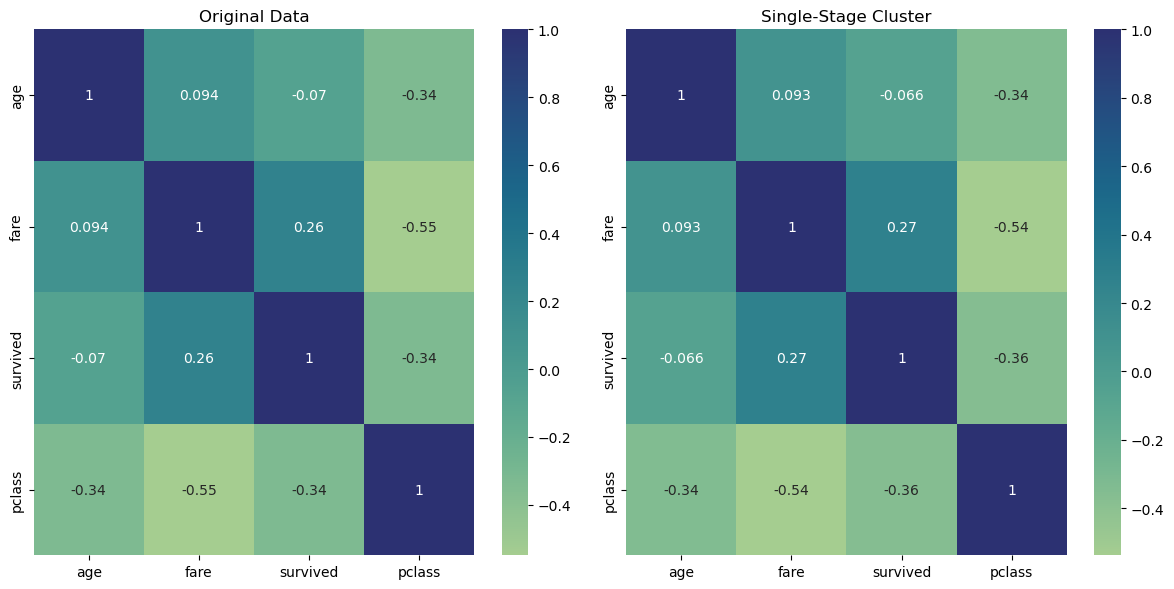

In [18]:
# INSERT CODE HERE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.heatmap(data[['age', 'fare', 'survived', 'pclass']].corr(), annot=True, cmap='crest')
plt.title('Original Data')

plt.subplot(1, 2, 2)
sns.heatmap(selected_data[['age', 'fare', 'survived', 'pclass']].corr(), annot=True, cmap='crest')
plt.title('Single-Stage Cluster')

plt.tight_layout()

In [19]:
selected_data.describe()

,survived,pclass,age,sibsp,parch,fare
count,812.000000,812.000000,812.000000,812.000000,812.000000,812.000000
mean,0.381773,2.254926,29.436786,0.533251,0.402709,33.881398
std,0.486121,0.844384,13.225725,1.114915,0.816985,51.465091
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,22.000000,0.000000,0.000000,8.050000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,15.245800
75%,1.000000,3.000000,36.000000,1.000000,1.000000,33.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Insights:**

  * Both datasets show negligible difference in terms of their heatmaps of the chosen columns
  * Correlation is typically fair when done in a large data set vs a sampled data set. It depending on the method of sampling
  * since the clusters used make up for majority of the datasets, it factored in the negligibility of the difference, or none thereof in their heatmaps.

### 4.5 Two-Stage Cluster Sampling

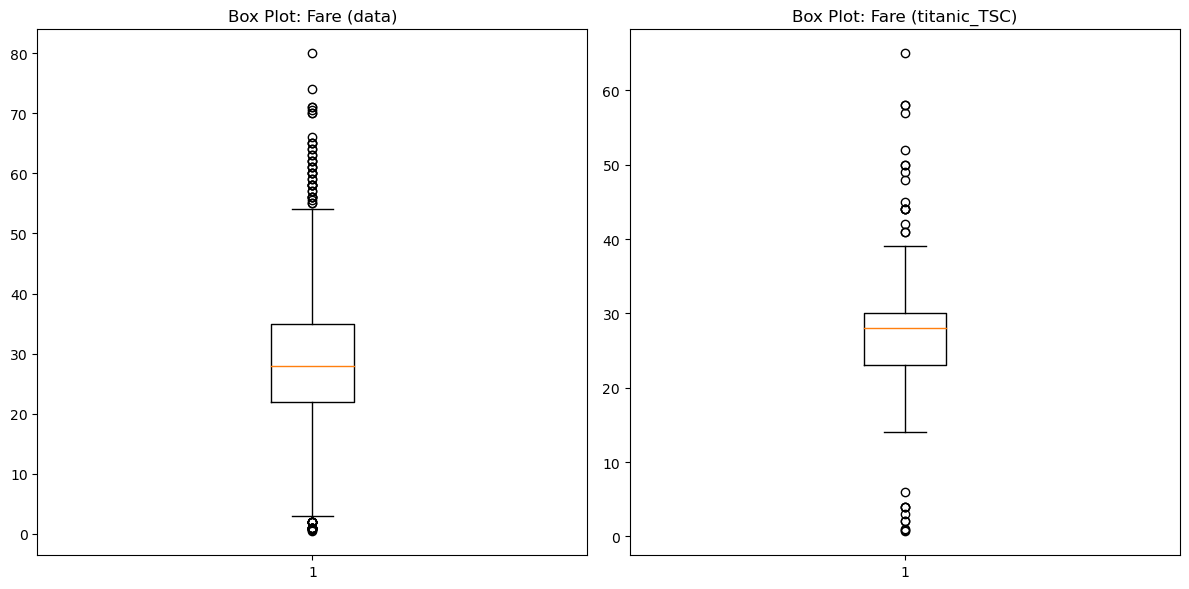

In [20]:
# INSERT CODE HERE
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data['age'])
plt.title('Box Plot: Fare (data)')

plt.subplot(1, 2, 2)
plt.boxplot(cluster_samples['age'])
plt.title('Box Plot: Fare (titanic_TSC)')

plt.tight_layout()

In [21]:
cluster_samples.describe()

,survived,pclass,age,sibsp,parch,fare
count,120.00000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,0.45000,2.308333,27.583333,0.466667,0.358333,30.002084
std,0.49958,0.857942,12.033062,1.028447,0.797009,39.052885
min,0.00000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,0.00000,1.000000,23.000000,0.000000,0.000000,7.750000
50%,0.00000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.00000,3.000000,30.000000,1.000000,0.000000,29.268750
max,1.00000,3.000000,65.000000,8.000000,5.000000,227.525000


**Insights:**

  * Original dataset: Contains more outliers due to it being a larger dataset
  * Systematic sample: Shows a cleaner plot, still having a lot of outliers, but are more spaced out, and is bound by smaller quartiles
  * The mean of both are close to one another, making the method a feasible way of sampling

**Reasons for the Fare Distribution Discrepancy:**

 **Smaller Data set has less variance:**
   * Since the sampled dataset uses less counts, the variance of each instance is limited to that sample, thus showing a generally smaller graph

## 5. Summary of Learnings

1. **Data Cleaning:** At first, we didn't know that the data had missing values. It's a good thing we double-check the data before exploration. Preparing data through cleaning and investigation is vital for understanding its structure and identifying patterns.
<br>

2. **Data Sampling Techniques:**

* **Simple Random Sampling:** It broadens class representation, ensuring a more diverse perspective. Randomness enhances the generalizability of insights, allowing for the extraction of patterns applicable across various scenarios and contexts.
<br>
* **Systematic Sampling:**  From what we've learned in the systematic sample code, the regularized interval selection of every 5th observation simplifies the sampling process but introduces a systematic pattern. This regularity can lead to bias if it aligns with underlying patterns in the data. Despite the potential for bias, systematic sampling offers resource efficiency, particularly in large datasets, providing a practical balance between simplicity and representativeness in specific scenarios.
<br>
* **Stratified Sampling:** Stratified Sampling was employed here by dividing the dataset based on 'class' and performing random sampling within each stratum, ensuring representative samples from each subgroup. This method combines randomness with control, addressing the risk of underrepresentation and providing a nuanced understanding of the entire population. Enhancing precision through proportional sampling from each stratum minimizes the potential for overlooking minority groups and contributes to a more accurate representation of the dataset.
<br>
* **Single-Stage Cluster Sampling:** Exemplified by the random selection of two 'embark_town' types, strategically concentrates on specific clusters within the dataset. The randomized cluster selection maintains the benefits of randomness, minimizing bias and ensuring representativeness. This approach allows for a focused analysis of chosen subgroups, providing valuable insights into the characteristics and patterns specific to the selected 'embark_town' clusters within the broader population.
<br>
* **Two-Stage Cluster Sampling:** We divided the dataset based on 'embark_town' and performed random sampling within each cluster, efficiently capturing variations associated with embarkation towns while preserving their characteristics. This method enhances representativeness by accounting for geographical variations, providing a nuanced understanding of the dataset's diversity. The balanced subsample derived from each town offers insights that might be overlooked in other sampling methods.

3. **Data Visualization**

Visualization techniques played a crucial role in this laboratory, as the challenge involved identifying the appropriate groups to test with the sampling techniques. At the same time, there was a sense of being overwhelmed in determining the suitable visualization graphs or tools for each sampling method.